## Group Name: PBJ
### Members:
### 1. Poulami Ghosh
### 2. Bramantyo Ibrahim Supriyatno
### 3. Julie Morgan


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def activation_f(h):
    return np.greater(h,0).astype(int)

In [16]:
def perceptron_y(w, theta, x):
    h = np.dot(w.T,x) - theta
    return activation_f(h)

# Exercise H2.1 
### (a)

In [17]:
ao = pd.read_csv('applesOranges.csv')
ao.head()

,x.1,x.2,y
0,0.365,0.708,0
1,0.543,-0.268,0
2,-0.401,0.643,0
3,0.866,-0.796,0
4,-0.386,0.742,0


In [18]:
apples = ao[ao['y']== 0].drop('y', axis=1)
oranges = ao[ao['y']==1].drop('y', axis=1)

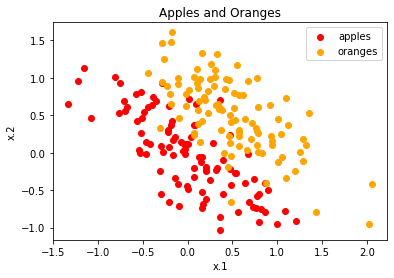

In [19]:
plt.scatter(x=apples['x.1'], y=apples['x.2'], c='red', label='apples')
plt.scatter(x=oranges['x.1'], y=oranges['x.2'], c='orange', label='oranges')

plt.xlabel('x.1')
plt.ylabel('x.2')

plt.title('Apples and Oranges')

plt.legend()
plt.show()

### (b)

In [20]:
def to_cartesian(vector_magnitude, angle):
    x = vector_magnitude * np.cos(angle)
    y = vector_magnitude * np.sin(angle)
    return np.stack((x,y))

In [21]:
angles = np.linspace(0, np.pi, 19)
angles_degree = angles*180/np.pi

In [22]:
print(angles_degree)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180.]


In [25]:
W = to_cartesian(1, angles)
np.sin(angles_degree)

array([ 0.        , -0.54402111,  0.91294525, -0.98803162,  0.74511316,
       -0.26237485, -0.30481062,  0.77389068, -0.99388865,  0.89399666,
       -0.50636564, -0.04424268,  0.58061118, -0.93010595,  0.98023966,
       -0.71487643,  0.21942526,  0.34664946, -0.80115264])

In [11]:
print(W)

[[ 1.00000000e+00  9.84807753e-01  9.39692621e-01  8.66025404e-01
   7.66044443e-01  6.42787610e-01  5.00000000e-01  3.42020143e-01
   1.73648178e-01  6.12323400e-17 -1.73648178e-01 -3.42020143e-01
  -5.00000000e-01 -6.42787610e-01 -7.66044443e-01 -8.66025404e-01
  -9.39692621e-01 -9.84807753e-01 -1.00000000e+00]
 [ 0.00000000e+00  1.73648178e-01  3.42020143e-01  5.00000000e-01
   6.42787610e-01  7.66044443e-01  8.66025404e-01  9.39692621e-01
   9.84807753e-01  1.00000000e+00  9.84807753e-01  9.39692621e-01
   8.66025404e-01  7.66044443e-01  6.42787610e-01  5.00000000e-01
   3.42020143e-01  1.73648178e-01  1.22464680e-16]]


In [12]:
ao_features = ao[['x.1','x.2']].to_numpy()
ao_class = ao[['y']].to_numpy()

#### (i)

In [13]:
pred = perceptron_y(W,0,ao_features.T)
percentage_correct = np.mean(pred==ao_class.T, axis=1)
print(percentage_correct)

[0.675 0.705 0.76  0.745 0.71  0.735 0.755 0.75  0.725 0.69  0.63  0.6
 0.565 0.52  0.505 0.465 0.42  0.35  0.325]


#### (ii)

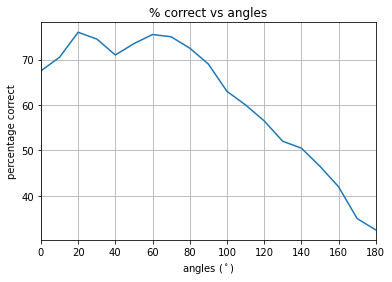

In [14]:
plt.plot(angles_degree, percentage_correct*100)
plt.grid()

plt.title('% correct vs angles')

plt.ylabel('percentage correct')
plt.xlabel('angles ($^\circ$)')
plt.xlim(0,180)
plt.show()

### (c)

In [15]:
max_index = np.argmax(percentage_correct)
print(max_index)

2


In [16]:
max_weight = W[:,max_index]
print(max_weight)

[0.93969262 0.34202014]


In [17]:
thetas = np.linspace(-3,3,100)

In [18]:
percentage_corrects = np.zeros(len(thetas))
for i,theta in enumerate(thetas) :
    pred = perceptron_y(max_weight,theta,ao_features.T)
    percentage_corrects[i] = np.mean(pred==ao_class.T, axis=1)

In [19]:
max_theta_index = np.argmax(percentage_corrects)
max_theta = thetas[max_theta_index]

In [20]:
print(max_theta)

0.15151515151515138


### (d)

In [21]:
pred = perceptron_y(max_weight,max_theta,ao_features.T)
percentage_corrects = np.mean(pred==ao_class.T, axis=1)

In [22]:
pred_apples = ao[pred== 0].drop('y', axis=1)
pred_oranges = ao[pred==1].drop('y', axis=1)

In [23]:
x = np.linspace(-2,2,100)
y = (-max_weight[0]/max_weight[1])*x +max_theta/max_weight[1]

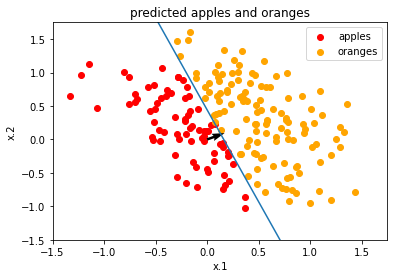

In [24]:
plt.scatter(x=pred_apples['x.1'], y=pred_apples['x.2'], c='red', label='apples')
plt.scatter(x=pred_oranges['x.1'], y=pred_oranges['x.2'], c='orange', label='oranges')
plt.title('predicted apples and oranges')
plt.xlabel('x.1')
plt.ylabel('x.2')

plt.xlim(-1.5,1.75)
plt.ylim(-1.5,1.75)
plt.plot(x,y)

plt.quiver(0,0 , max_weight[0], max_weight[1])
plt.legend()

plt.show()

In [25]:
percentage_corrects

array([0.8])

#### result interpretation

the method works quite well as the percentage of correct prediction is around 80 %. However if we observe the dataset, it is quite clear that there is an weight angle that gives better prediction. It is necesarry to increase the number of samples of angles to a larger number to get the best result. 

### (e)

In [26]:
num_w = 100
num_theta = 100

In [27]:
angles = np.linspace(0, np.pi, num_w)
angles_degree = angles*180/np.pi
W = to_cartesian(1, angles)

In [28]:
thetas = np.linspace(-3,3,num_theta)

In [29]:
res_matrix = np.zeros((num_w, num_theta))

for i in range(num_w):
    for j,theta in enumerate(thetas):
        w = W[:,i]
        pred = perceptron_y(w,theta,ao_features.T)
        percentage_correct = np.mean(pred==ao_class.T, axis=1)
        res_matrix[i,j] = percentage_correct

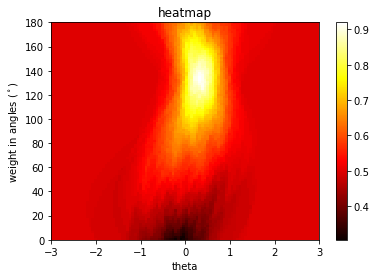

In [30]:
plt.imshow(res_matrix, cmap='hot', interpolation='nearest', extent=[thetas[0], thetas[-1], angles_degree[0], angles_degree[-1]], aspect='auto')
plt.colorbar()

#plt.set_aspect(2)
#plt.xticks(angles_degree)
#plt.yticks(thetas[::20])
plt.xlabel('theta')
plt.ylabel('weight in angles ($^\circ$)')
plt.title('heatmap')
plt.show()

### (f)

although grid search method is fairly easy to implement, it will not give the best result as shown in the previous exercise (1.d). Furthermore, the method will not work for larger data space since it would require to iterate over numerous weight possibilities. For example, if we want to classify cats and dogs images, we need to put weights on all the pixels of the images. For a 28 x 28 image, we would need 784 for each color channel excluding biases. 

# Exercise H2.2

In [31]:
np.random.seed(100) # make sure that the plot wont change when being run on other machine

In [32]:
def perceptron(w, theta, x):
    h = np.dot(w.T,x) - theta
    return h

In [33]:
def mlp(x, w10, w21, b):
    h1 = perceptron(w10,b,x)
    s1 = np.tanh(h1)
    h2 = perceptron(w21,0,s1)
    return h2

In [34]:
n_hid = 10
n_in = 1
n_out = 1

In [35]:
x = np.linspace(-2,2,1000)

### (a)


In [36]:
w21_list = []
w10_list = []
b_list = []

for i in range(50):
    w10 = np.random.normal(0,2,(n_in ,n_hid))
    w21 = np.random.normal(0,1,(n_hid,n_out))
    b = np.random.uniform(-2,2,(n_hid,1))
    
    w10_list.append(w10)
    w21_list.append(w21)
    b_list.append(b)

### (b)

In [37]:
y_list = []
for i in range(50):
    res = mlp(x.reshape(1,-1), w10_list[i], w21_list[i], b_list[i])
    y_list.append(res)

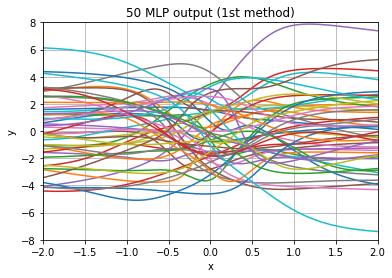

In [38]:
for i in range(50):
    plt.plot(x, y_list[i].ravel())

plt.title('50 MLP output (1st method)')
plt.ylabel('y')
plt.xlabel('x')

plt.grid()

plt.ylim(-8,8)
plt.xlim(-2,2)

plt.show()

### (c)

In [39]:
w10_v2_list = []

for i in range(50):
    w10 = np.random.normal(0,0.5,(n_in ,n_hid))    
    w10_v2_list.append(w10)

In [40]:
y_v2_list = []
for i in range(50):
    res = mlp(x.reshape(1,-1), w10_v2_list[i], w21_list[i], b_list[i])
    y_v2_list.append(res)

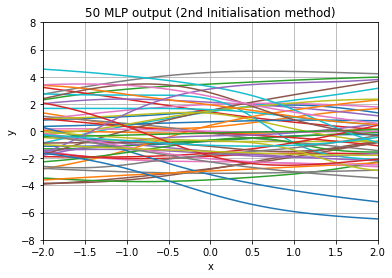

In [41]:
for i in range(50):
    plt.plot(x, y_v2_list[i].ravel())
    
plt.title('50 MLP output (2nd Initialisation method)')
plt.ylabel('y')
plt.xlabel('x')

plt.grid()
plt.ylim(-8,8)
plt.xlim(-2,2)
plt.show()

it is quite clear that when initialising the weight, larger variance on the W10 would give a wilder plot with greater swings. 

### (d)

In [42]:
G = -x

In [43]:
def mse(X,Y):
    return np.mean(np.square(np.subtract(X ,Y)))

In [44]:
mses= np.zeros(50)
for i in range(50):
    mses[i] = mse(y_list[i],G)

In [45]:
lowest_mse_idx = np.argmin(mses)

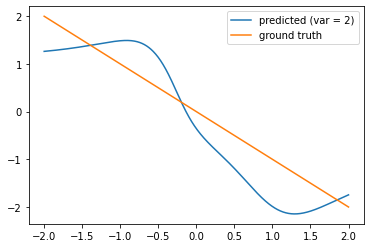

In [46]:
y_pred = mlp(
    x.reshape(1,-1), 
    w10_list[lowest_mse_idx],
    w21_list[lowest_mse_idx], 
    b_list[lowest_mse_idx])

plt.plot(x,y_pred.ravel(), label='predicted (var = 2)')
plt.plot(x,G, label='ground truth')
plt.legend()
plt.show()

In [47]:
mses= np.zeros(50)
for i in range(50):
    mses[i] = mse(y_v2_list[i],G)
lowest_mse_idx = np.argmin(mses)

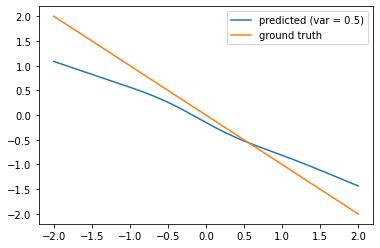

In [48]:
y_pred_2 = mlp(
    x.reshape(1,-1), 
    w10_v2_list[lowest_mse_idx],
    w21_list[lowest_mse_idx], 
    b_list[lowest_mse_idx])

plt.plot(x,y_pred_2.ravel(), label='predicted (var = 0.5)')
plt.plot(x,G, label='ground truth')
plt.legend()
plt.show()